In [1]:
import pandas as pd
from matplotlib import pyplot as plt

## TODO LIST

- [X] Grafico pizza do `success`, para saber a porcentagem de pacotes recebidos com error
- [X] Calcular a duração do teste pegando o time
- [X] Gráfico de linha para SNR e RSSI

### Dados do teste

O teste foi realizado no bloco dos professores do IFPB-CG, do laboratório Assert(localização do gateway), no térreo, até o laboratório GComPI(localização do end-node), no subsolo, a distâncias entre esse dois laboratórios é aproximadamente  60 metros. Temos que ressaltar que o meio de transmissão é provido de vários obstáculos, entre eles, paredes densas, partes metálicas e equipamentos eletrônicos, o que dificulta a transmissão dos pacotes.


| Variável  | Valor |
|-|-|
| __Duração__ | 5 dias |
| __Distância__ | Em torno de 60 metros |
| __Interferência do ambiente__ | Alta |
| __Frequência__ | 916MHz |

O gateway, ao receber os pacotes, envia para o servidor, hospedado na Microsoft Azure, os dados.

### Get datas

In [2]:
packages = pd.read_json('packages.json')
sensors = pd.read_json('sensors.json')

#### Delete host column

A coluna host nesse teste representa o nome do teste, em todas as medidas ele tem o mesmo valor por isso a realização da remoção da coluna para deixar apenas os dados necessários.

In [3]:
del packages['host']

In [4]:
packages

,time,id,rssi,snr,success
0,2019-10-23T13:29:53.413Z,0,-119,-12.00,False
1,2019-10-23T13:03:21.738Z,0,-118,-11.75,False
2,2019-10-23T11:03:30.714Z,0,-115,-11.75,False
3,2019-10-23T10:59:45.787Z,0,-115,-12.00,False
4,2019-10-23T10:52:51.842Z,0,-115,-11.75,False
...,...,...,...,...,...
410,2019-10-17T14:04:08.706Z,5,-113,-3.25,True
411,2019-10-17T13:59:08.333Z,4,-118,1.25,True
412,2019-10-17T13:54:08.107Z,3,-118,0.50,True
413,2019-10-17T13:49:07.880Z,2,-118,0.50,True


#### Converting time column to DateTime type

In [5]:
packages['time'] = pd.to_datetime(packages['time'])
sensors['time'] = pd.to_datetime(sensors['time'])

#### Calculate the duration of the test

In [6]:
packages['time'].max() - packages['time'].min() 

Timedelta('5 days 23:45:45.780000')

#### Plot a pie graph
this graph represents percent of packages transmition sucess

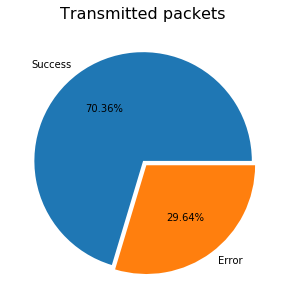

In [7]:
labels = ['Success', 'Error']
values = packages['success'].value_counts()

fig = plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%0.2f%%', explode=[0, 0.05])

plt.title('Transmitted packets', fontsize=16)
plt.show()

Podemos supor que, se em um dia for trasmitido um pacote por hora, temos uma perda, em media, de 7 pacotes por dia

#### Plot a graph line for RSSI and SNR

Grafico do RSSI e do SNR ao decorrer de um dia

In [8]:
min = pd.Timestamp('2019-10-17', tz='UTC')
max = pd.Timestamp('2019-10-17 23:59:59', tz='UTC')

values = packages[packages['time'] >= min]
values = values[ values['time'] <= max]

values.size

300

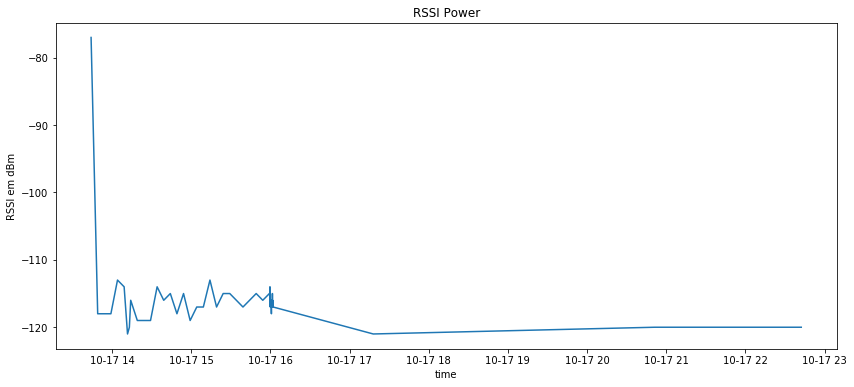

In [12]:
plt.figure(figsize=(14, 6))
plt.plot(values['time'], values['rssi'])

plt.title('RSSI Power')
plt.xlabel('time')
plt.ylabel('RSSI em dBm')
plt.show()

O transceptor LoRa consegue receber até __-120dBm__, abaixo desse valor, fica o LoRa tem muita dificuldade de tratá-lo

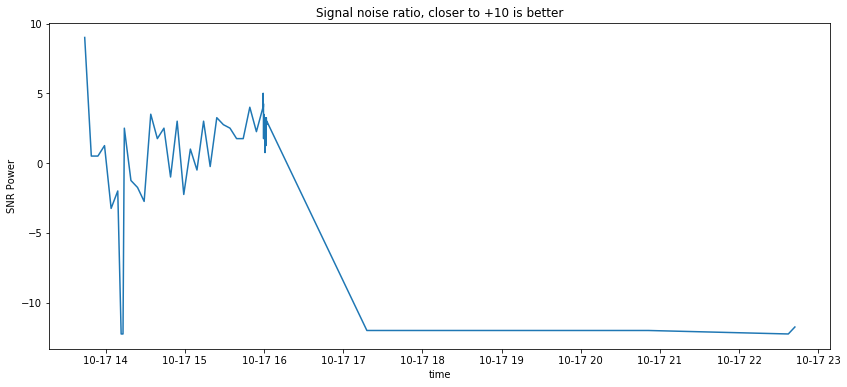

In [10]:
plt.figure(figsize=(14, 6))
plt.plot(values['time'], values['snr'])

plt.title('Signal noise ratio, closer to +10 is better')
plt.ylabel('SNR Power')
plt.xlabel('time')
plt.show()

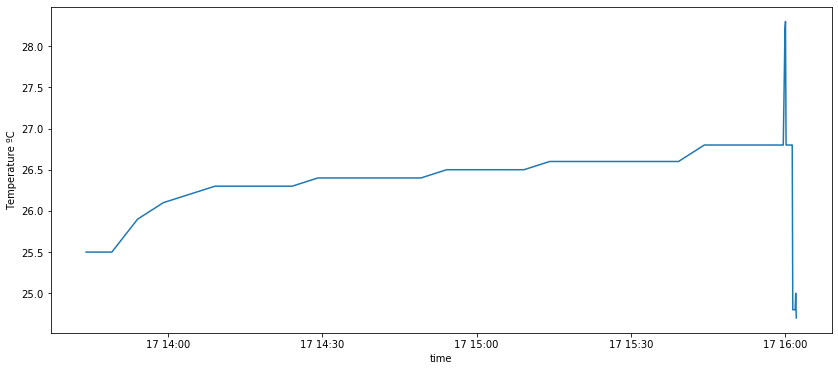

In [11]:
sensor = sensors[sensors['time'] >= min]
sensor = sensor[sensor['time'] <= max]

plt.figure(figsize=(14, 6))
plt.plot(sensor['time'], sensor['temperature'])

plt.ylabel('Temperature ºC')
plt.xlabel('time')
plt.show()